# <span style = "color:coral"> Customer Behaviour Classification </span>

***

In this project, we will try to predict if the customer purchase the product or not using various machine learning models and Deploy the model with Tkinter library

## Contents

The data represents details about 400 clients of a company including the unique ID, the gender, the age of the customer and the salary. Besides this, we have collected information regarding the buying decision - weather the customer decided to buy specific products or not.

## Let's Begin

### Import all necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Read 'Customer_Behaviour.csv' dataset and store it in a dataframe variable

In [2]:
df = pd.read_csv("Customer_Behaviour.csv")

### View the top 5 rows

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


### View info of the dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


### View basic statistical information about the dataset

In [5]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


### Check for any null values

In [6]:
df.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

### View unique values in Gender

In [7]:
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [8]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

### Convert male to 0 and Female to 1 in Gender column

In [9]:
def gender(Gender):
    if Gender == 'Male':
        return 0
    elif Gender == 'Female':
        return 1

In [10]:
df['Gender'] = df['Gender'].apply(gender)
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,0,19,19000,0
1,15810944,0,35,20000,0
2,15668575,1,26,43000,0
3,15603246,1,27,57000,0
4,15804002,0,19,76000,0


#### Drop user ID column

In [11]:
df.drop(columns=['User ID'],inplace = True)

In [12]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,0,19,19000,0
1,0,35,20000,0
2,1,26,43000,0
3,1,27,57000,0
4,0,19,76000,0


## <span style = "color: orange"> Data Visualization </span>

### Plot heatmap to view the correlation between features

<Axes: >

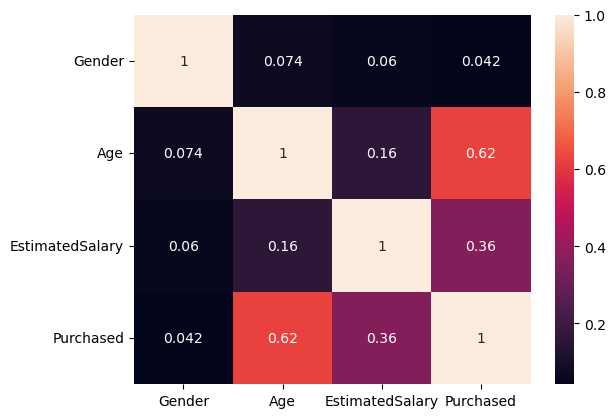

In [13]:
sns.heatmap(df.corr(),annot = True)

### Plot a countplot of gender with respect to purchased

In [14]:
df.columns

Index(['Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [15]:
df['Purchased'].unique()

array([0, 1])

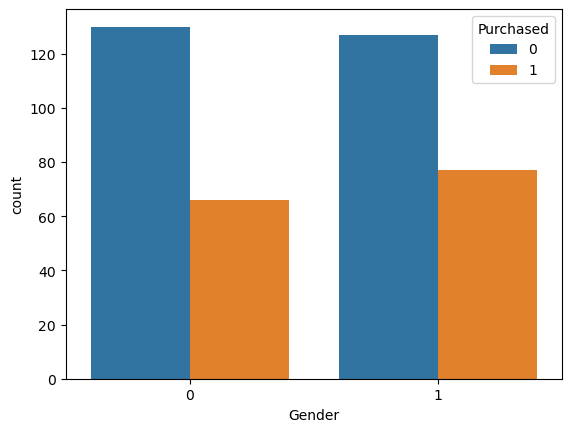

In [16]:
sns.countplot(data = df, x='Gender',hue= "Purchased")
plt.show()

### Plot a displot of Age

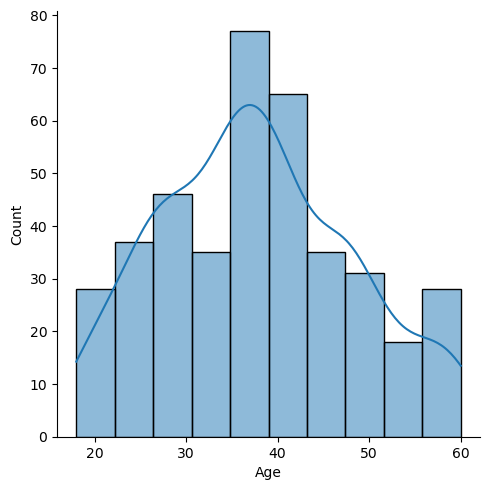

In [17]:
sns.displot(df['Age'], kde = True)
plt.show()

### Plot pairplot of the dataset

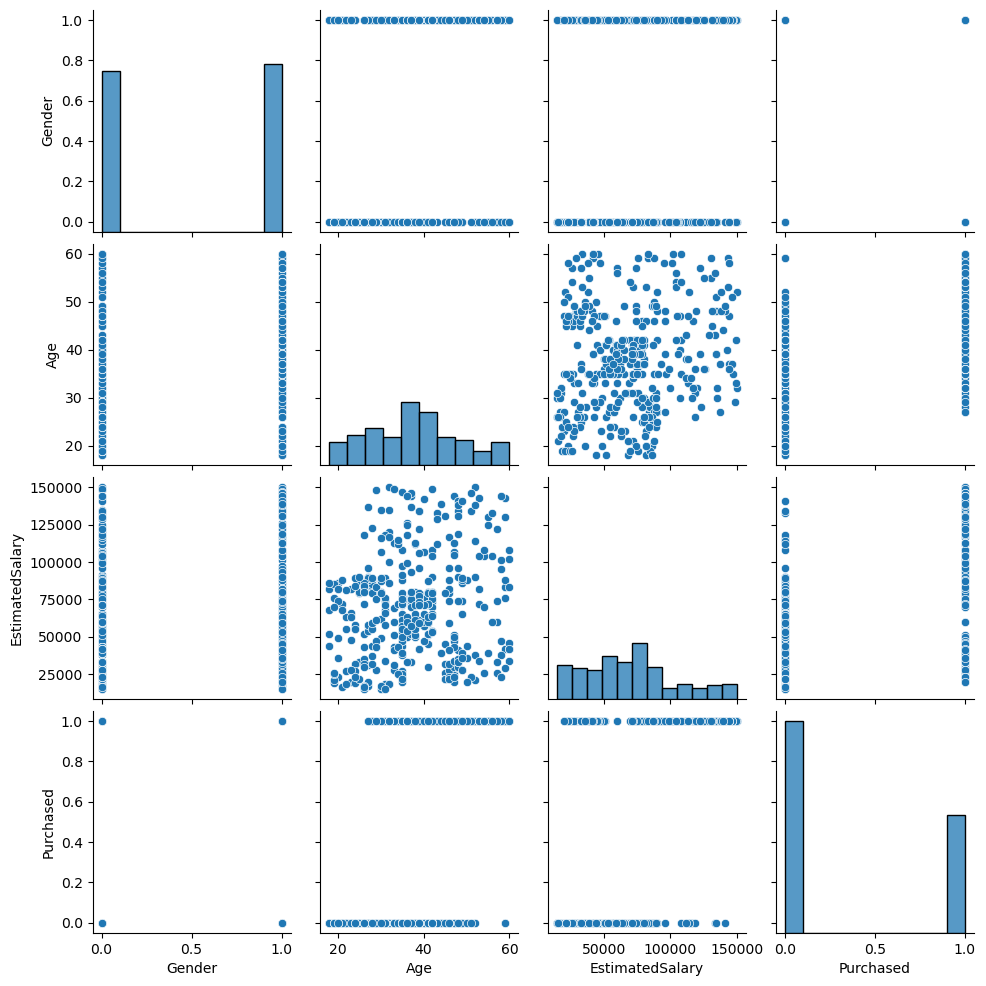

In [18]:
sns.pairplot(df)
plt.show()

## Data Preprocessing

### Split the dataset into input and target variables

In [19]:
df.columns

Index(['Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [20]:
X = df[['Gender', 'Age', 'EstimatedSalary']]

In [21]:
y = df['Purchased']

### Scale the data using StandardScaler

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
scaler = StandardScaler()

In [24]:
xcolumns = X.columns

In [25]:
X = scaler.fit_transform(X)

In [26]:
X = pd.DataFrame(X, columns = xcolumns )

In [27]:
X.head()

,Gender,Age,EstimatedSalary
0,-1.020204,-1.781797,-1.490046
1,-1.020204,-0.253587,-1.460681
2,0.980196,-1.113206,-0.785290
3,0.980196,-1.017692,-0.374182
4,-1.020204,-1.781797,0.183751


### Split the dataset into training and testing set

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=100)

### Check shape of X_train and X_test

In [30]:
X_train.shape

(280, 3)

In [31]:
X_test.shape

(120, 3)

## ML Models

### Logistic Regression Classifier

In [32]:
from sklearn.linear_model import LogisticRegression
from  sklearn import metrics
from sklearn.model_selection import cross_val_score

In [33]:
model = LogisticRegression()

In [34]:
model.fit(X_train,y_train)

LogisticRegression()

In [35]:
print(f'Score of trained model is :{model.score(X_train,y_train)}')

Score of trained model is :0.8464285714285714


In [36]:
y_pred = model.predict(X_test)

In [37]:
print(f'Accuracy score of trained model is :{metrics.accuracy_score(y_pred,y_test)}')

Accuracy score of trained model is :0.8333333333333334


In [38]:
print(f'Confusion Mtrix is:{metrics.confusion_matrix(y_pred,y_test)}')

Confusion Mtrix is:[[72 17]
 [ 3 28]]


In [39]:
print(f'Classification report is :\n{metrics.classification_report(y_pred,y_test)}')

Classification report is :
              precision    recall  f1-score   support

           0       0.96      0.81      0.88        89
           1       0.62      0.90      0.74        31

    accuracy                           0.83       120
   macro avg       0.79      0.86      0.81       120
weighted avg       0.87      0.83      0.84       120



### Random Forest Classifier

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
rfc = RandomForestClassifier()

In [42]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [43]:
print(f'Score of trained model is :{rfc.score(X_train,y_train)}')

Score of trained model is :0.9964285714285714


In [44]:
y_pred = rfc.predict(X_test)

In [45]:
print(f'Accuracy score of trained model is :{metrics.accuracy_score(y_pred,y_test)}')

Accuracy score of trained model is :0.9166666666666666


In [46]:
print(f'Confusion Matrix is:{metrics.confusion_matrix(y_pred,y_test)}')

Confusion Matrix is:[[72  7]
 [ 3 38]]


In [47]:
print(f'Classification report is :\n{metrics.classification_report(y_pred,y_test)}')

Classification report is :
              precision    recall  f1-score   support

           0       0.96      0.91      0.94        79
           1       0.84      0.93      0.88        41

    accuracy                           0.92       120
   macro avg       0.90      0.92      0.91       120
weighted avg       0.92      0.92      0.92       120



### Support Vector Machine

In [48]:
from sklearn.svm import SVC

In [49]:
svc = SVC(probability = True)

In [50]:
svc.fit(X_train,y_train)

SVC(probability=True)

In [51]:
import pickle
pickle_out = open("Customer_Behaviour.pkl", "wb")
pickle.dump(svc, pickle_out)
pickle_out.close()

In [52]:
import joblib
joblib.dump(scaler, 'scaler.pkl')

with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)  

In [53]:
print(f'Score of trained model is :{svc.score(X_train,y_train)}')

Score of trained model is :0.9035714285714286


In [54]:
y_pred = svc.predict(X_test)

In [55]:
print(f'Accuracy score of trained model is :{metrics.accuracy_score(y_pred,y_test)}')
print(f'Confusion Matrix is:{metrics.confusion_matrix(y_pred,y_test)}')

Accuracy score of trained model is :0.925
Confusion Matrix is:[[72  6]
 [ 3 39]]


In [56]:
print(f'Classification report is :\n{metrics.classification_report(y_pred,y_test)}')

Classification report is :
              precision    recall  f1-score   support

           0       0.96      0.92      0.94        78
           1       0.87      0.93      0.90        42

    accuracy                           0.93       120
   macro avg       0.91      0.93      0.92       120
weighted avg       0.93      0.93      0.93       120



### Assign cross val scores of all models into a dataframe

In [57]:
cv_scores = {
    "Logistic Regression": cross_val_score(model, X, y, cv=5).mean(),
    "SVM": cross_val_score(svc, X, y, cv=5).mean(),
    "Random Forest": cross_val_score(rfc, X, y, cv=5).mean()
}

df = pd.DataFrame({"Model": list(cv_scores.keys()),"Score": list(cv_scores.values())})
df

,Model,Score
0,Logistic Regression,0.820
1,SVM,0.900
2,Random Forest,0.855


***

## Deploy the model with highest score using Streamlit

In [58]:
### In this case its SVM Classifier

#### Define a function that will output to an entry box in Streamlit
##### Import all modules from Streamlit
##### Create Streamlit window with all necessary entryboxes and labels

In [59]:
%%writefile customer_behaviour_app.py

# Imports
import streamlit as st
import pickle
import numpy as np

# Load model safely
def load_model():
    try:
        with open("Customer_Behaviour.pkl",'rb') as file:
            model = pickle.load(file)
    
        scaler = None 
        try:
            with open("scaler.pkl",'rb') as file:
                scaler = pickle.load(file)
        except:
            st.warning("Scaler not found or invalid")
    
        return model,scaler

    except FileNotFoundError as e:
        st.error(f"Model file not found: {e}")
        return None, None
    except Exception as e:
        st.error(f"Error loading artifacts: {e}")
        return None, None

model, scaler = load_model()

# Convert gender input to numeric
def genderInput(gender_input):
    gender_input = gender_input.lower().strip()
    if gender_input == 'male':
        return 0
    elif gender_input == 'female':
        return 1
    else:
        return None

# Convert prediction result to Yes / No (NO THRESHOLD - like Flask version)
def resultOutput(result):
    """
    Convert numeric prediction to meaningful output
    0 = Not Purchased, 1 = Purchased
    """
    if result == 1:
        return 'Yes'
    else:
        return 'No'

# Prediction function - CORRECTED to match Flask version
def customer_satisfaction_prediction(gender_input, age_input, salary_input, debug=False):
    try:
        if debug:
            st.write("DEBUG: Starting prediction function")
        
        gender_value = genderInput(gender_input)

        if gender_value is None:
            return "Error: Gender must be Male or Female", None

        age_value = float(age_input)
        salary_value = float(salary_input)

        # CORRECTED: Use same feature order as Flask version [Gender, Age, Salary]
        input_data = np.array([[gender_value, age_value, salary_value]])

        if debug:
            st.write(f"DEBUG: Raw input data - Gender: {gender_value}, Age: {age_value}, Salary: {salary_value}")

        if scaler is None or not hasattr(scaler, 'transform'):
            return "Error: Scaler not available or invalid. Please check scaler.pkl file.", None

        scaled_data = scaler.transform(input_data)
        
        if debug:
            st.write(f"DEBUG: Scaled data: {scaled_data}")

        prediction = model.predict(scaled_data)
        probabilities = model.predict_proba(scaled_data)
        predicted_purchase = int(prediction[0])  # numeric 0 or 1
        
        # CORRECTED: Use same confidence calculation as Flask version
        # Confidence for the predicted class (not just class 1)
        confidence = probabilities[0][predicted_purchase]

        if debug:
            st.write(f"DEBUG: Raw Prediction Output: {prediction}")
            st.write(f"DEBUG: Prediction Probabilities: {probabilities}")
            st.write(f"DEBUG: Predicted class: {predicted_purchase}")
            st.write(f"DEBUG: Confidence for predicted class: {confidence:.4f}")
        
        return predicted_purchase, confidence

    except Exception as e:
        return f"Prediction Error: {e}", None

# Main app
def main():
    st.title('Customer Behaviour Prediction Web App')
    
    # Add debug toggle
    debug_mode = st.checkbox('Enable Debug Mode', value=False)
    
    # Use better input methods
    gender_input = st.selectbox('Select Gender', ['Male', 'Female'])
    age_input = st.number_input('Enter Age', min_value=18, max_value=100, value=30)
    salary_input = st.number_input('Enter Estimated Salary', min_value=0, value=50000, step=1000)

    if st.button('Predict Customer Purchase'):
        if model is None:
            st.error("Model not loaded properly. Please check model files.")
            return
            
        result, confidence = customer_satisfaction_prediction(gender_input, age_input, salary_input, debug=debug_mode)

        # If result is error message (string), show error
        if isinstance(result, str) and (result.startswith("Error") or result.startswith("Prediction Error")):
            st.error(result)
        else:
            # CORRECTED: Use resultOutput without threshold (like Flask version)
            result_output = resultOutput(result)
            st.success(f"Will the customer purchase? : {result_output}")
            if confidence is not None:
                st.info(f"Confidence: {confidence:.2%}")

if __name__ == '__main__':
    main()

Overwriting customer_behaviour_app.py


In [ ]:
import sys
!{sys.executable} -m streamlit run customer_behaviour_app.py

In [ ]:
#x= 'Gender', 'Age', 'EstimatedSalary' y ='Purchased'

***

# <span style = "color:green;font-size:40px"> Great Job! </span>